# Business Goal

- **TODO**: Use data from 2019 to optimize mailing in 2020.
- **HOW**: Build up Binary Classification model to estimate target revenue for customers.(>=10)
- **Stragegy**: After prediction, only mail catalog to customers with more than $10 target revenue.

# 1. Preparation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_excel('./Statistical Databse Marketing Analyst Project 2020.xlsx', sheet_name=1)

In [3]:
data.dropna(inplace=True)
data.set_index('Customer ID', inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9699 entries, 1001 to 11000
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Size                      9699 non-null   float64
 1   Number Of Web Visits      9699 non-null   int64  
 2   12Months Net Rev          9699 non-null   int64  
 3   24Months  Net Rev         9699 non-null   int64  
 4   Loyalty Program Status    9699 non-null   object 
 5   Loyalty Program Weeks     9699 non-null   float64
 6   12Months Orders           9699 non-null   int64  
 7   12Months Rev              9699 non-null   int64  
 8   Time Since Last Purchase  9699 non-null   int64  
 9   Corporate Orders          9699 non-null   int64  
 10  Corporate Rev             9699 non-null   int64  
 11  Gender                    9699 non-null   int64  
 12  Age Group                 9699 non-null   int64  
 13  Target Rev                9699 non-null   float64
dtypes: f

,Size,Number Of Web Visits,12Months Net Rev,24Months Net Rev,Loyalty Program Status,Loyalty Program Weeks,12Months Orders,12Months Rev,Time Since Last Purchase,Corporate Orders,Corporate Rev,Gender,Age Group,Target Rev
Customer ID,,,,,,,,,,,,,,
1001,5.0,0,0,0,C,190.0,0,0,94,0,0,0,1,0.0
1002,4.0,0,40,40,Y,59.0,2,190,16,2,190,1,7,0.0
1004,9.0,0,0,70,N,520.0,0,0,6,9,406,1,5,0.0
1006,4.0,0,0,0,Y,398.0,0,0,60,4,281,1,6,0.0
1007,6.0,0,288,288,N,520.0,4,288,5,7,401,1,7,0.0


# 2. EDA

## 2.1 Target

- Highly Skewed & Imbalanced
    - Resampling
    - Metrics
    - Loss Function
    - Algorithm

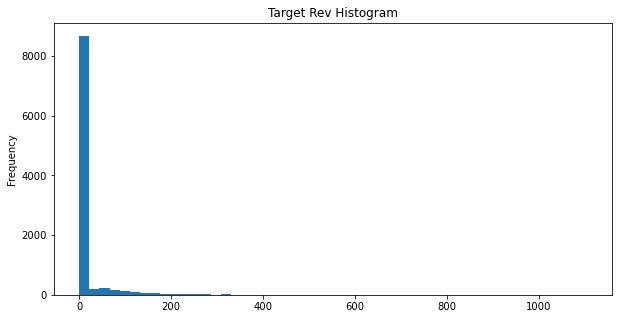

In [4]:
target_hist = data['Target Rev'].plot(kind='hist', bins=50, figsize=(10, 5), title='Target Rev Histogram')

In [5]:
# Change value into class

data['Target'] = data['Target Rev'].apply(lambda x: 1 if x >= 10 else 0)
data['Target'].value_counts()

0    8616
1    1083
Name: Target, dtype: int64

# 2.2 Feature

- Feature Selection & Engineering
    - Independence
        - PCA
        - Regularization, L1 & L2
    - Standarization & Normalization
    - Categorical Feature Encoding
        - OneHotEncoding
        - LabelEncoding
        - TargetEncoding

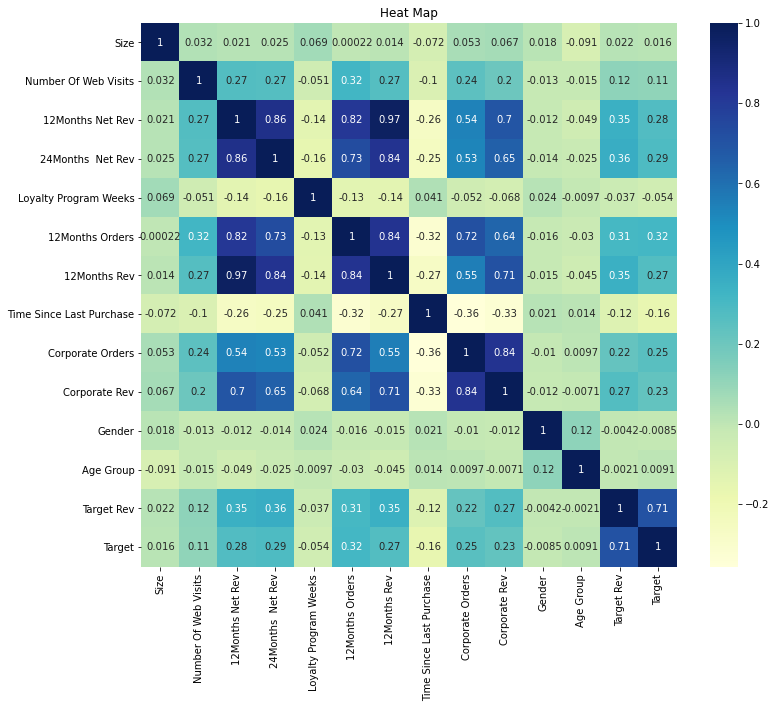

In [6]:
_, ax = plt.subplots(figsize=(12, 10))
ax.set(title="Heat Map")
ax = sns.heatmap(data.corr(), cmap='YlGnBu', ax=ax, annot=True)

# 3. Modeling
- Random Forest
    - Pros
        - Not likely to overfit.
        - Robust to imbalanced data.
        - Robust to categorical features.
        - Robust to unscaled features.
        - Robust to outliers.
        - Nonlinearity.
        - Easy to implement.
    - Cons
        - Complexity

In [7]:
# Label Encoding
encoder = LabelEncoder()
data['Loyalty Program Status'] = encoder.fit_transform(data['Loyalty Program Status'])

In [8]:
# Split Train Set & Test Set

features = ['Size', 'Number Of Web Visits', '12Months Net Rev',
            '24Months  Net Rev', 'Loyalty Program Status', 'Loyalty Program Weeks',
            '12Months Orders', '12Months Rev', 'Time Since Last Purchase',
            'Corporate Orders', 'Corporate Rev', 'Gender', 'Age Group',]

X = data[features].values
y = data['Target'].values
rev = data['Target Rev'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)
_, _, rev_train, rev_test = train_test_split(X, rev, test_size=0.33, random_state=6)

In [9]:
# Implement Baseline Model

model = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=6, class_weight={0:1, 1:8})
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 8},
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [10]:
# Prediction
y_pred = model.predict(X_test)

# 4. Evaluation

- Metrics
    - Accuracy
    - Precision
    - Recall
    - F1-score
    - ROC
- Business Metrics
    - Total Net Revenue
    - Net Revenue per Mail
- Trade off
    - Precision *vs* Recall
    - Total Net Revenue *vs* Net Revenue per Mail

In [11]:
print('Train Set Accuracy: ', model.score(X_train, y_train))
print('Test Set Accuracy: ', model.score(X_test, y_test))
print('Test Set Precision: ', precision_score(y_test, y_pred))
print('Test Set Recall: ', recall_score(y_test, y_pred))
print('Test Set ROC: ', roc_auc_score(y_test, y_pred))
print('Test Set F1-score: ', f1_score(y_test, y_pred))

Train Set Accuracy:  0.8454909202831641
Test Set Accuracy:  0.8138081849422055
Test Set Precision:  0.31746031746031744
Test Set Recall:  0.546448087431694
Test Set ROC:  0.6973863012114379
Test Set F1-score:  0.40160642570281124


Let's see how much profit increased by the prediction model

In [12]:
# Total Revenue

# Strategy 1: only mail to customers with prediction class 1
target_customer = rev_test[y_pred == 1]
print('Strategy 1: ', target_customer.sum() - len(target_customer) * 10)

# Strategy 2: mail to all customers
print('Strategy 2: ', rev_test.sum() - len(rev_test) * 10)

# God's perspective：mail to customers with more than $10 target rev
print("God's perspective: ", rev_test[y_test == 1].sum() - len(rev_test[y_test == 1]) * 10)

Strategy 1:  19275.700000000004
Strategy 2:  9363.440000000002
God's perspective:  37713.44


In [13]:
# Net Revenue per Mail

# Strategy 1: only mail to customers with prediction class 1
target_customer = rev_test[y_pred == 1]
print('Strategy 1: ', target_customer.sum() / len(target_customer) - 10)

# Strategy 2: mail to all customers
print('Strategy 2: ', rev_test.sum() / len(rev_test) - 10)

# God's perspective：mail to customers with more than $10 target rev
print("God's perspective: ", rev_test[y_test == 1].sum() / len(rev_test[y_test == 1]) - 10)

Strategy 1:  30.59634920634921
Strategy 2:  2.9251608872227433
God's perspective:  103.04218579234973


# 5. Future Work

- Data Preprocessing
    - Outlier Detection
    - Imputation
- Feature Engineering
    - Encoding
    - Time Series
    - Other
- Algorithm
    - Hyper-paramter Tuning
    - Other algorithm
- Pipeline
    - Data Leakage
    - Standarization & Scaling
    - Cross Validation